In [14]:
url = "https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip"
import wget
wget.download(url) 

'gzip.zip'

In [3]:
import zipfile
with zipfile.ZipFile("gzip.zip","r") as  zip_ref:
    zip_ref.extractall()

In [2]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import layers, models
from mnist import MNIST
import os

In [3]:
emnist_data = MNIST(path='gzip', return_type='numpy')
emnist_data.select_emnist('byclass')
x_train, y_train = emnist_data.load_training()
x_test, y_test = emnist_data.load_testing()

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((697932, 784), (697932,), (116323, 784), (116323,))

In [5]:
img_side = 28
x_train = x_train.reshape(-1, img_side, img_side, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, img_side, img_side, 1).astype('float32') / 255.0

x_train.shape, x_test.shape

((697932, 28, 28, 1), (116323, 28, 28, 1))

In [6]:
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)
input_shape = (img_side, img_side, 1)
class_weights = dict(enumerate(compute_class_weight(class_weight = "balanced",
                                        classes = unique_classes,
                                        y = y_train   
)))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
     

In [7]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10,
    restore_best_weights=True)

In [ ]:
model.fit(x_train, y_train,
          batch_size=10000,
          epochs=200,
          verbose=1,
          shuffle=True,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

In [24]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3636/3636 [==============================] - 11s 3ms/step - loss: 0.3708 - accuracy: 0.8648
Test loss: 0.3707844614982605
Test accuracy: 0.8647645115852356


In [26]:
y_pred = model.predict(x_test)

3636/3636 [==============================] - 11s 3ms/step


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

<AxesSubplot: >

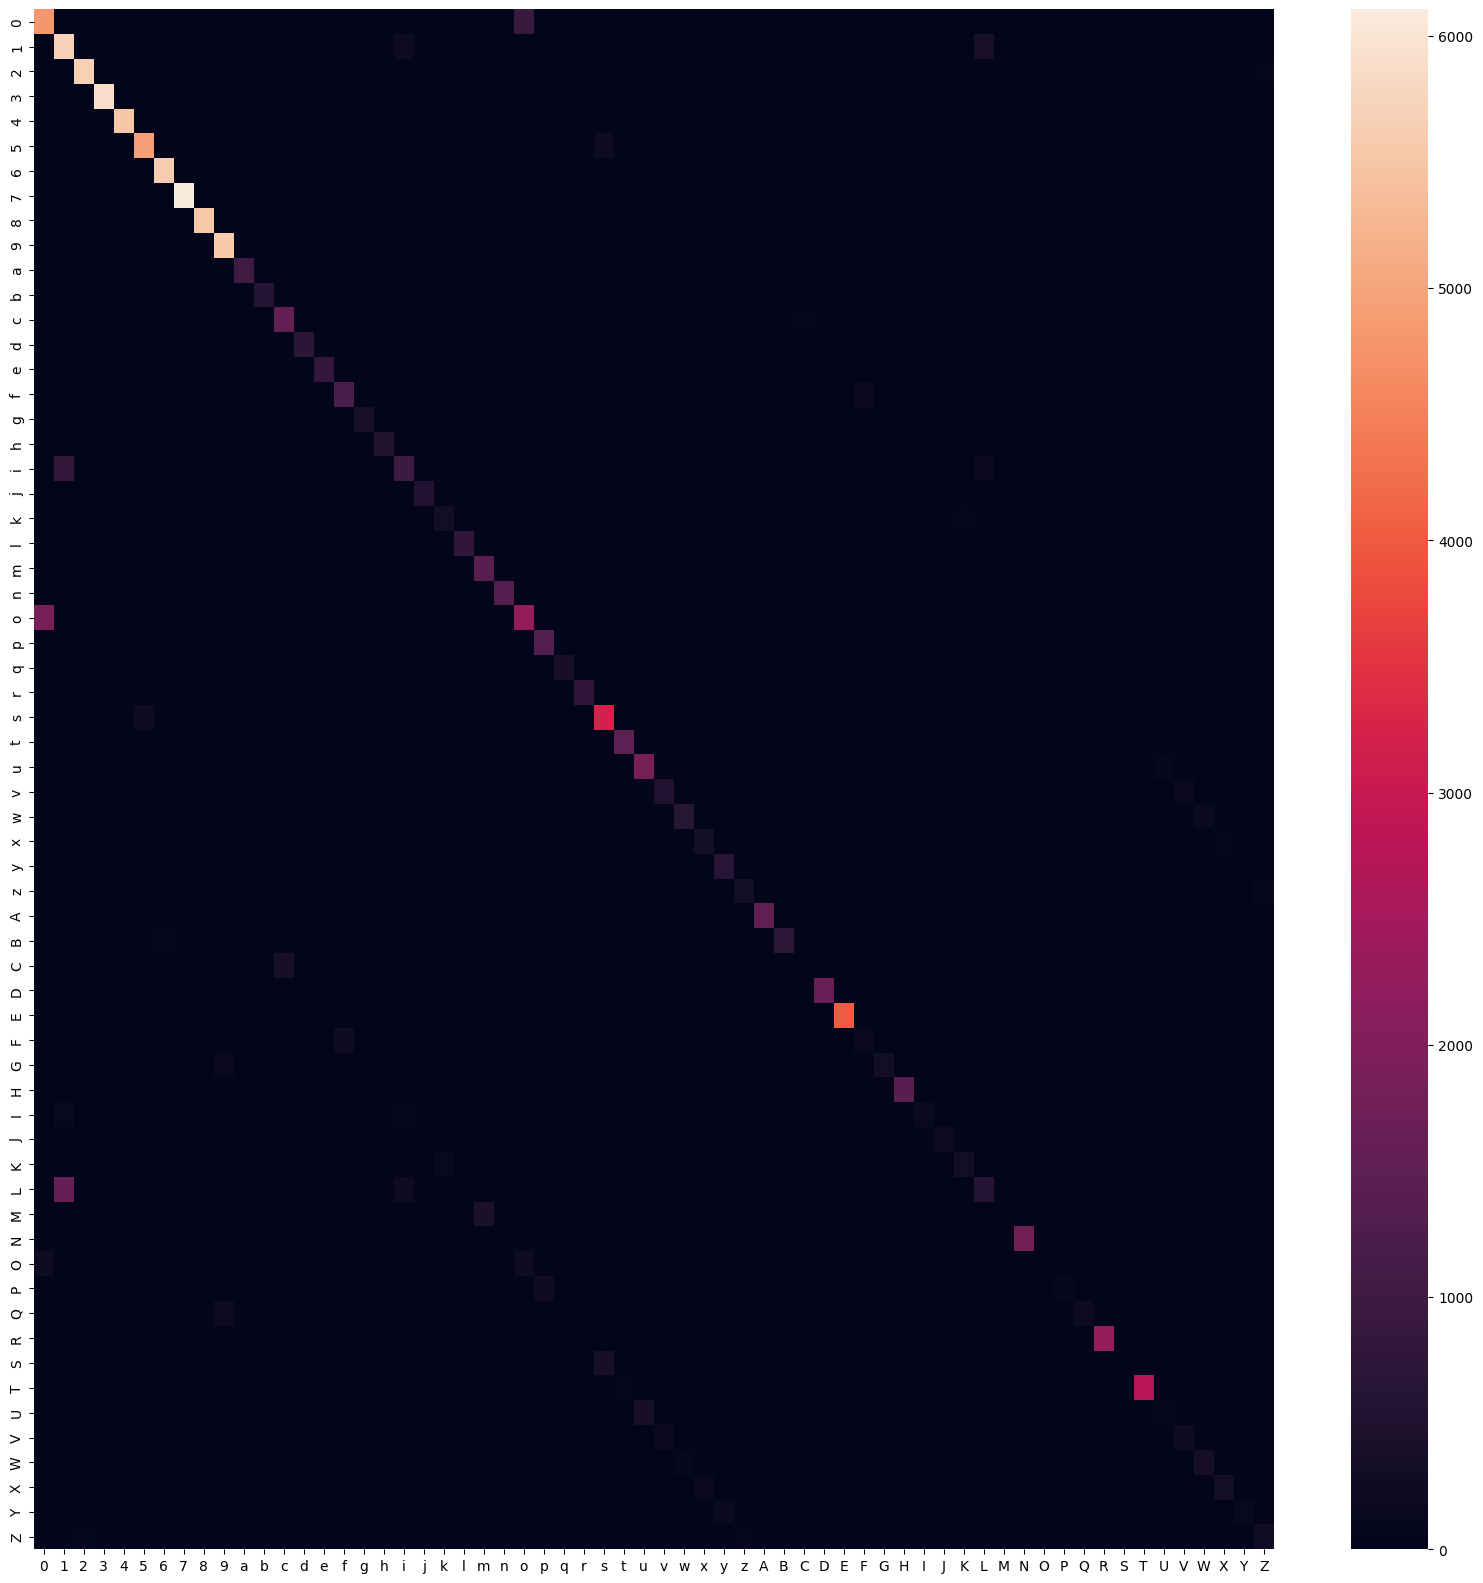

In [29]:
labels = string.digits+string.ascii_lowercase+string.ascii_uppercase
plt.subplots(figsize=(20,20))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)), xticklabels=labels, yticklabels=labels)

In [30]:
model.save("cnn.h5")

In [2]:
%pip install tensorflowjs

  Using cached tensorflowjs-4.2.0-py3-none-any.whl (84 kB)
  Using cached flax-0.6.5-py3-none-any.whl (209 kB)
  Using cached jax-0.4.3.tar.gz (1.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached packaging-20.9-py2.py3-none-any.whl (40 kB)
  Using cached tensorflowjs-4.1.0-py3-none-any.whl (84 kB)
  Using cached tensorflowjs-4.0.0-py3-none-any.whl (83 kB)
  Using cached tensorflowjs-3.21.0-py3-none-any.whl (81 kB)
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Using cached importlib_resources-5.10.2-py3-none-any.whl (34 kB)
  Using cached optax-0.1.4-py3-none-any.whl (154 kB)
  Using cached msgpack-1.0.4-cp310-cp310-win_amd64.whl (61 kB)
  Using cached orbax-0.1.1-py3-none-any.whl (70 kB)
  Using cached rich-13.3.1-py3-none-any.whl (239 kB)
  Using cached tensorstore-0.1.31-cp310-cp310-win_amd64.whl (6.6 MB)
  Using cached PyYAML-6.0-cp310-cp310-win_amd64.whl (151 kB)
  Using cached tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.9.0 which is incompatible.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorflow-intel 2.11.0 requires tensorboard<2.12,>=2.11, but you have tensorboard 2.9.0 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.9.0 which is incompatible.
jupyterlab-server 2.16.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.


In [3]:
!rm -rf jsmodel/
!tensorflowjs_converter --input_format keras "cnn.h5" ./jsmodel
!zip -r jsmodel.zip jsmodel/

"rm" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"zip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
